### 2. Comparing multi-class classifiers for handwritten digits

In [4]:
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [5]:
data = scipy.io.loadmat("mnist_10digits.mat")
X_train = data['xtrain'].reshape(60000, -1)
y_train = data['ytrain'].ravel()
X_test = data['xtest'].reshape(10000, -1)
y_test = data['ytest'].ravel()

X_train = X_train / 255.0
X_test = X_test / 255.0

X_train_small, _, y_train_small, _ = train_test_split(X_train, y_train, train_size=5000, stratify=y_train, random_state=42)

In [ ]:
classifiers = {
    "KNN (k=5)": KNeighborsClassifier(n_neighbors=5),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM (Linear)": SVC(kernel='linear'),
    "Kernel SVM (RBF)": SVC(kernel='rbf'),
    "Neural Network (MLP)": MLPClassifier(hidden_layer_sizes=(20, 10), max_iter=500)
}

results = {}

for name, model in classifiers.items():
    print(f"Training {name}...")
    if "KNN" in name or "SVM" in name:
        model.fit(X_train_small, y_train_small)
    else:
        model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred, output_dict=True)
    
    results[name] = {
        "Confusion Matrix": conf_matrix,
        "Precision": [class_report[str(i)]['precision'] for i in range(10)],
        "Recall": [class_report[str(i)]['recall'] for i in range(10)],
        "F1-score": [class_report[str(i)]['f1-score'] for i in range(10)],
    }

Training KNN (k=5)...
Training Logistic Regression...
Training SVM (Linear)...
Training Kernel SVM (RBF)...
Training Neural Network (MLP)...



KNN (k=5) Performance:
Confusion Matrix:
[[ 966    1    2    0    0    2    7    1    1    0]
 [   0 1128    2    2    1    0    2    0    0    0]
 [  23   37  920    9    1    4    4   26    8    0]
 [   1    7    8  957    1   14    1   10    6    5]
 [   2   22    1    0  893    1    7    3    1   52]
 [   6   15    1   29    2  813   13    2    3    8]
 [   7    7    0    0    3    3  938    0    0    0]
 [   0   34    4    1    8    1    0  957    0   23]
 [  14    8    4   29   11   30    5   13  841   19]
 [  13    8    3   10   13    1    1   26    0  934]]
Precision: [0.936046511627907, 0.8902920284135754, 0.9735449735449735, 0.922854387656702, 0.9571275455519829, 0.9355581127733027, 0.9591002044989775, 0.9219653179190751, 0.977906976744186, 0.8972142170989433]
Recall: [0.9857142857142858, 0.9938325991189427, 0.8914728682170543, 0.9475247524752475, 0.9093686354378818, 0.9114349775784754, 0.9791231732776617, 0.9309338521400778, 0.8634496919917864, 0.9256689791873142]
F1-score:

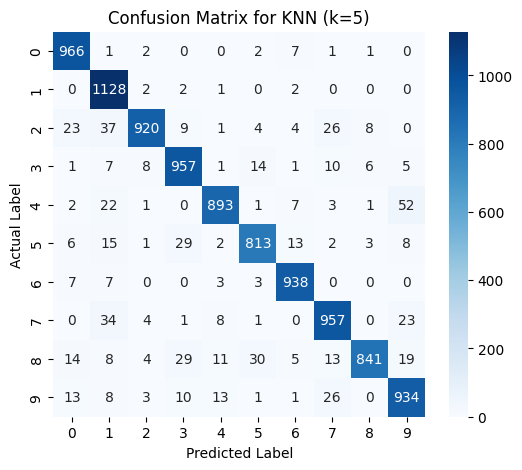


Logistic Regression Performance:
Confusion Matrix:
[[ 955    0    2    4    1   10    4    3    1    0]
 [   0 1110    5    2    0    2    3    2   11    0]
 [   6    9  930   14   10    3   12   10   34    4]
 [   4    1   16  925    1   23    2   10   19    9]
 [   1    3    7    3  921    0    6    5    6   30]
 [   9    2    3   35   10  777   15    6   31    4]
 [   8    3    8    2    6   16  912    2    1    0]
 [   1    7   23    7    6    1    0  947    4   32]
 [   9   11    6   22    7   29   13   10  855   12]
 [   9    8    1    9   21    7    0   21    9  924]]
Precision: [0.9530938123752495, 0.9618717504332756, 0.929070929070929, 0.9042033235581622, 0.9369277721261444, 0.8951612903225806, 0.9431230610134437, 0.9320866141732284, 0.8805355303810505, 0.9103448275862069]
Recall: [0.9744897959183674, 0.9779735682819384, 0.9011627906976745, 0.9158415841584159, 0.9378818737270875, 0.8710762331838565, 0.9519832985386222, 0.9212062256809338, 0.87782340862423, 0.9157581764122894]

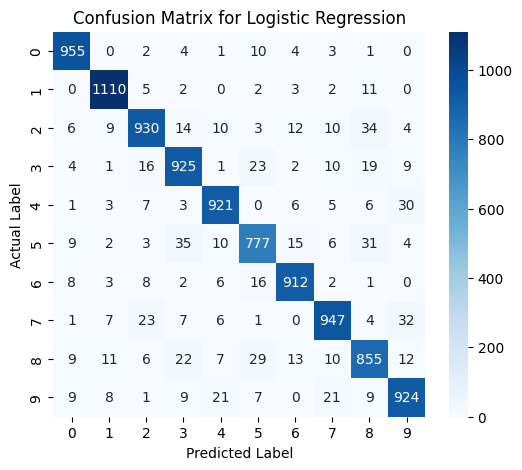


SVM (Linear) Performance:
Confusion Matrix:
[[ 962    0    3    1    0    6    5    1    2    0]
 [   0 1117    3    1    2    2    2    1    6    1]
 [  17   16  916   20   11    4   12   14   20    2]
 [   2    3   21  922    0   25    3    9   16    9]
 [   1    1    6    0  912    7   12    3    1   39]
 [   9    6   11   52    8  754   10    4   26   12]
 [  11    3   10    0    9   17  906    2    0    0]
 [   0   16   17    7   15    1    0  945    2   25]
 [  13   17   28   36   13   42    9    9  800    7]
 [   6    5    3   10   35    7    1   34    9  899]]
Precision: [0.9422135161606269, 0.9434121621621622, 0.899803536345776, 0.8789323164918971, 0.9074626865671642, 0.8716763005780347, 0.94375, 0.9246575342465754, 0.9070294784580499, 0.9044265593561368]
Recall: [0.9816326530612245, 0.9841409691629956, 0.8875968992248062, 0.9128712871287129, 0.9287169042769857, 0.8452914798206278, 0.9457202505219207, 0.919260700389105, 0.8213552361396304, 0.8909811694747275]
F1-score: [0.961

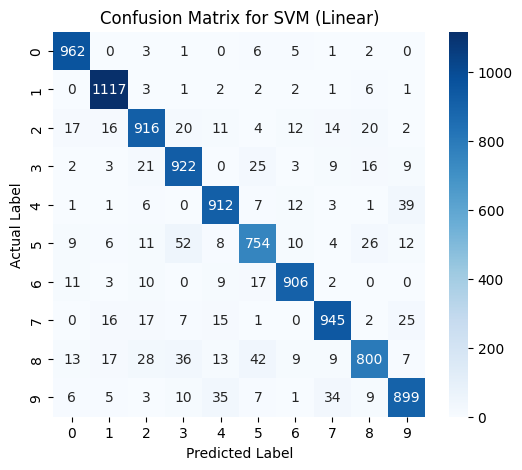


Kernel SVM (RBF) Performance:
Confusion Matrix:
[[ 969    0    2    1    0    3    3    1    1    0]
 [   0 1125    2    2    1    1    2    0    2    0]
 [  10    1  976    8    9    2    7    6   12    1]
 [   0    0   11  965    0   12    0   10    9    3]
 [   1    0    4    0  936    0   10    1    2   28]
 [   4    2    3   18    2  841    8    3    7    4]
 [  12    3    0    0    4    5  932    0    2    0]
 [   0   14   19    1    7    0    0  961    4   22]
 [   3    1    7   15    9   14    8    4  909    4]
 [   6    6    2   13   24    5    0   11    4  938]]
Precision: [0.9641791044776119, 0.9765625, 0.9512670565302144, 0.9433040078201369, 0.9435483870967742, 0.9524348810872028, 0.9608247422680413, 0.9638916750250752, 0.9548319327731093, 0.938]
Recall: [0.9887755102040816, 0.9911894273127754, 0.9457364341085271, 0.9554455445544554, 0.9531568228105907, 0.9428251121076233, 0.9728601252609603, 0.9348249027237354, 0.9332648870636551, 0.929633300297324]
F1-score: [0.976322418

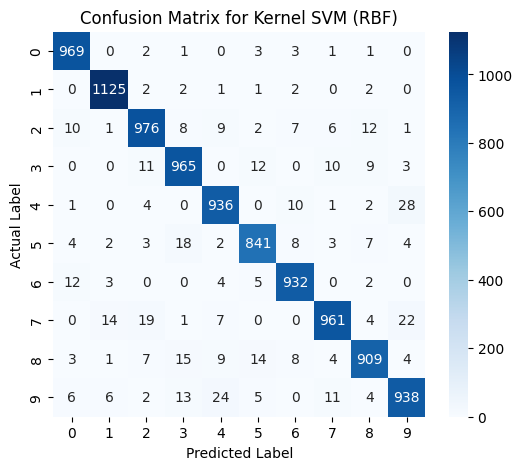


Neural Network (MLP) Performance:
Confusion Matrix:
[[ 947    0    3    0    4    5    6    2    4    9]
 [   0 1107    9    4    0    1    1    4    8    1]
 [   4    1  987   14    5    0    4   10    7    0]
 [   2    1   10  960    1   12    1    8   11    4]
 [   4    3    8    0  914    0    9    3    5   36]
 [   3    1    2   17    3  835    9    3   15    4]
 [   9    2    4    1    9   16  905    3    8    1]
 [   0    3   16    7    3    1    0  981    1   16]
 [   7    1   12    8    8    8    3    6  914    7]
 [   3    3    1    8   16    6    1    8    6  957]]
Precision: [0.9673135852911133, 0.9866310160427807, 0.938212927756654, 0.9421000981354269, 0.9491173416407062, 0.9445701357466063, 0.9637912673056444, 0.9542801556420234, 0.933605720122574, 0.9246376811594202]
Recall: [0.9663265306122449, 0.9753303964757709, 0.9563953488372093, 0.9504950495049505, 0.9307535641547862, 0.9360986547085202, 0.9446764091858038, 0.9542801556420234, 0.9383983572895277, 0.948463825569871

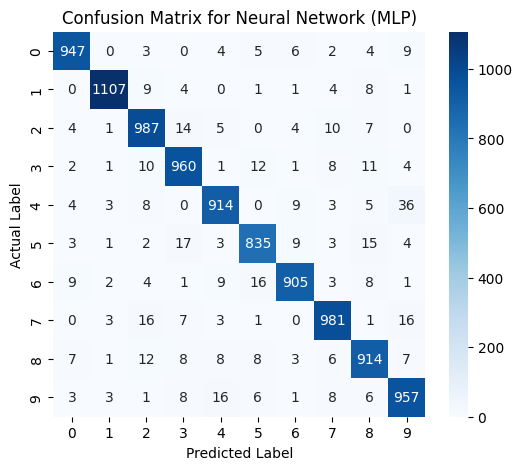

In [10]:
for name, metrics in results.items():
    print(f"\n{name} Performance:")
    print("Confusion Matrix:")
    print(metrics["Confusion Matrix"])
    
    print("Precision:", metrics["Precision"])
    print("Recall:", metrics["Recall"])
    print("F1-score:", metrics["F1-score"])
    
    plt.figure(figsize=(6, 5))
    sns.heatmap(metrics["Confusion Matrix"], annot=True, fmt='d', cmap="Blues")
    plt.title(f"Confusion Matrix for {name}")
    plt.xlabel("Predicted Label")
    plt.ylabel("Actual Label")
    plt.show()
